<a href="https://colab.research.google.com/github/Sank-Infinity/Predict-The-Flight-Ticket-Price/blob/master/Predict_The_Flight_Ticket_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict The Flight Ticket Price





In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## load train and test dataset 

train = pd.read_excel('/content/Data_Train.xlsx')
test = pd.read_excel('/content/Test_set.xlsx')

In [0]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [0]:
test.head()          # here price column is missing obviously because we have to predict it 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [0]:
## for feature engineering lets merge train and test dataset

dataset = train.append(test, sort=False)

In [0]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [0]:
dataset.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [0]:
dataset.shape         ## As we can observe price column for test dataset is fill with NaN values

(13354, 11)

# Feature Engineeting 

In [0]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [0]:
##  our machine learning model doesn't understand date/month/year format so we need to seperate it.

dataset['Date'] = dataset['Date_of_Journey'].str.split('/').str[0]

In [0]:
dataset.head(5)                 ## we are successfully seperated date similary we are going to seperate month and year 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01


In [0]:
dataset['Month'] = dataset['Date_of_Journey'].str.split('/').str[1]
dataset['Year']  = dataset['Date_of_Journey'].str.split('/').str[2]

In [0]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [0]:
dataset = dataset.drop(['Date_of_Journey'], axis=1)

In [0]:
## let's convert our date, month and year column in int 

dataset['Date'] = dataset['Date'].astype(int)
dataset['Month'] = dataset['Month'].astype(int)
dataset['Year'] = dataset['Year'].astype(int)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [0]:
## Now let's play with arrival time 
## In the same column we are updating values. we are removing excessive part from string and only keeping time

dataset['Arrival_Time'] = dataset['Arrival_Time'].str.split(' ').str[0]

In [0]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [0]:
## let's check for null values 

dataset[dataset['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [0]:
dataset['Total_Stops'] = dataset['Total_Stops'].fillna('2 stops')

In [0]:
dataset[dataset['Total_Stops'].isnull()]       ## now we dont have any null values in total stops 

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year


In [0]:
dataset.isnull().sum()                ## let's check overall null values

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [0]:
dataset['Route'] = dataset['Route'].fillna('DEL → LKO → BOM → COK')               ## we have one null value at route lets fill it 
dataset.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [0]:
## now in our dataset TOtal_stops is a categorical variables lets replace non - stop with 0 stop for make it lucid

dataset['Total_Stops'] = dataset['Total_Stops'].replace('non-stop','0 stop')

In [0]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [0]:
## now let's get rid of from stops in total stops 

dataset['Total_Stops'] = dataset['Total_Stops'].str.split(' ').str[0]

In [0]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302.0,1,3,2019


In [0]:
## but here is a problem if we go and check the datatype of total_stops is still object type lets typecast it into int

dataset['Total_Stops'] = dataset['Total_Stops'].astype(int)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13354 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13354 non-null  int64  
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.4+ MB


In [0]:
## Now lets handle arrival time 

dataset['Arrival_hours'] = dataset['Arrival_Time'].str.split(':').str[0]
dataset['Arrival_minutes'] = dataset['Arrival_Time'].str.split(':').str[1]

## Now we have to be type cast it into int 

dataset['Arrival_hours'] = dataset['Arrival_hours'].astype(int)
dataset['Arrival_minutes'] = dataset['Arrival_minutes'].astype(int)

## It is time to drop Arrical_time feature from dataset because we have extracted required information.

dataset = dataset.drop(['Arrival_Time'], axis=1)

In [0]:
## Now lets handle Departure time 

dataset['Dep_hours'] = dataset['Dep_Time'].str.split(':').str[0]
dataset['Dep_minutes'] = dataset['Dep_Time'].str.split(':').str[1]

## Now we have to be type cast it into int 

dataset['Dep_hours'] = dataset['Dep_hours'].astype(int)
dataset['Dep_minutes'] = dataset['Dep_minutes'].astype(int)

## It is time to drop Arrical_time feature from dataset because we have extracted required information.

dataset = dataset.drop(['Dep_Time'], axis=1)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13354 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13354 non-null  int64  
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_hours    13354 non-null  int64  
 12  Arrival_minutes  13354 non-null  int64  
 13  Dep_hours        13354 non-null  int64  
 14  Dep_minutes      13354 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 1.6+ MB


In [0]:
dataset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [0]:
## let's split our Route feature 

dataset['Route_1'] = dataset['Route'].str.split(' →').str[0]
dataset['Route_2'] = dataset['Route'].str.split(' →').str[1]
dataset['Route_3'] = dataset['Route'].str.split(' →').str[2]
dataset['Route_4'] = dataset['Route'].str.split(' →').str[3]
dataset['Route_5'] = dataset['Route'].str.split(' →').str[4]

In [0]:
# Now Drop the Route feature
dataset = dataset.drop(['Route'], axis=1)

In [0]:
dataset.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [0]:
## now we need to handle these NaN values

dataset['Route_1'].fillna("None", inplace=True)
dataset['Route_2'].fillna("None", inplace=True)
dataset['Route_3'].fillna("None", inplace=True)
dataset['Route_4'].fillna("None", inplace=True)
dataset['Route_5'].fillna("None", inplace=True)

In [0]:
# Now Drop the Duration feature
dataset = dataset.drop(['Duration'], axis=1)

In [0]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None


In [0]:
## fill NaN value with mean
dataset['Price'].fillna((dataset['Price'].mean()), inplace= True)

In [0]:
# let's apply label encoding on categorical features

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Airline'] = encoder.fit_transform(dataset['Airline'])
dataset['Source'] = encoder.fit_transform(dataset['Source'])
dataset['Destination'] = encoder.fit_transform(dataset['Destination'])
dataset['Additional_Info'] = encoder.fit_transform(dataset['Additional_Info'])
dataset['Route_1'] = encoder.fit_transform(dataset['Route_1'])
dataset['Route_2'] = encoder.fit_transform(dataset['Route_2'])
dataset['Route_3'] = encoder.fit_transform(dataset['Route_3'])
dataset['Route_4'] = encoder.fit_transform(dataset['Route_4'])
dataset['Route_5'] = encoder.fit_transform(dataset['Route_5'])

In [0]:
dataset.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,0,10,27,11,5
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,2,20,1,3,5
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,3,27,4,5,5
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,2,29,3,11,5
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,0,29,7,11,5


# Feature Selection

In [0]:
## Import required Libraries 

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [0]:
## Seperater train and test dataset

train = dataset[0:10683]
test  = dataset[10683:]

In [0]:
### Seperate feature of matrics and target variable
X = train.drop(['Price'], axis=1)
y = train['Price']

In [0]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,24,3,2019,1,10,22,20,0,10,27,11,5
1,1,3,0,2,8,1,5,2019,13,15,5,50,2,20,1,3,5
2,4,2,1,2,8,9,6,2019,4,25,9,25,3,27,4,5,5
3,3,3,0,1,8,12,5,2019,23,30,18,5,2,29,3,11,5
4,3,0,5,1,8,1,3,2019,21,35,16,50,0,29,7,11,5


In [0]:
 y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [0]:
## Let's split our dataset into train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
## extremely useful algorithm which helps us to know efficiency of features with respective to results

model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [0]:
## let's see what our model suggests us which features play vital role for predicting target 
## we need to skip that column which has 'False' value 
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [0]:
selected_features = X_train.columns[(model.get_support())]

In [0]:
## we can observe selected features 
## here we can see that column 'Year' has not that much influence on target values because we are working in same year all year values are same '2019'
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_hours', 'Arrival_minutes', 'Dep_hours',
       'Dep_minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [0]:
X_train = X_train.drop(['Year'], axis=1)
X_test = X_test.drop(['Year'], axis=1)

# Random Forest regressor 

In [0]:
# Randomized search CV
from sklearn.model_selection import RandomizedSearchCV

# Adding some hypertuning parameters to model
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(start=5, stop= 30, num=6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf =  [1, 2, 5,10]

In [0]:
# create random grid 

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [0]:
rf_random = RandomizedSearchCV(estimator=regressor, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=50, cv=5, verbose=2, random_state=42)

In [0]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.2s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 18.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
y_pred = rf_random.predict(X_test)

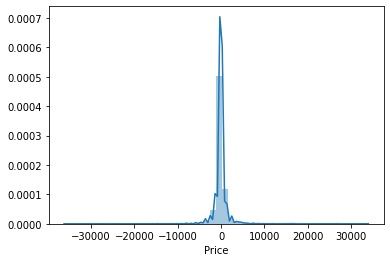

In [0]:
## here in graph we can observe normal distribution 

import seaborn as sns
sns.distplot(y_test-y_pred)

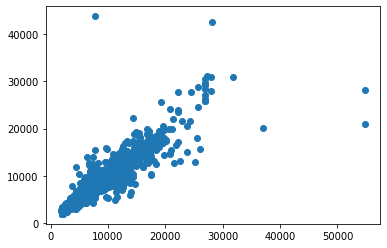

In [0]:
plt.scatter(y_test, y_pred)

In [0]:
test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hours,Arrival_minutes,Dep_hours,Dep_minutes,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,1,8,9087.064121,6,6,2019,4,25,17,30,3,6,6,11,5
1,3,3,0,1,8,9087.064121,12,5,2019,10,20,6,20,2,28,3,11,5
2,4,2,1,1,5,9087.064121,21,5,2019,19,0,19,15,3,6,6,11,5
3,6,2,1,1,8,9087.064121,21,5,2019,21,0,8,0,3,6,6,11,5
4,0,0,2,0,8,9087.064121,24,6,2019,2,45,23,55,0,10,27,11,5


In [0]:
test = pd.DataFrame(test)

In [0]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_hours', 'Arrival_minutes', 'Dep_hours',
       'Dep_minutes', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [0]:
test_X = test[selected_features]

In [0]:
test_y = test['Price']

In [0]:
test_X.shape

(2671, 16)

In [0]:
## prediction for test dataset

test_pred = rf_random.predict(test_X)

In [0]:
test_pred.astype(int)

array([14714,  4248, 12895, ..., 15763, 15663,  7565])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


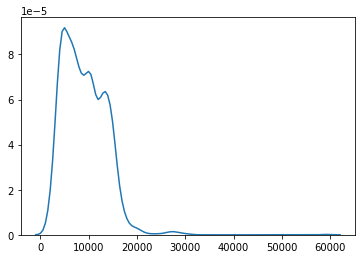

In [0]:
## data looks a like right skewed
sns.distplot(test_pred, test_y)            